In [1]:
import sys
sys.path.insert(0,'../')

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import helper

In [3]:
data = pd.read_csv('stroke-data.csv')

In [4]:
data.shape

(5110, 12)

In [5]:
data.tail()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0
5109,44679,Female,44.0,0,0,Yes,Govt_job,Urban,85.28,26.2,Unknown,0


In [6]:
log_glu = np.sqrt(data.avg_glucose_level)

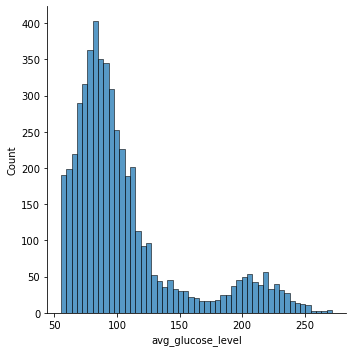

In [7]:
sns.displot(data.avg_glucose_level)

In [8]:
data.describe()
###
# average age of man who had stroke=43
# 25th percentile age is 25, 50th is 45, 75th is 61 

#target class where stroke=1 is just 4.87% out of total population - very skewed

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [9]:
data.drop(data[data.bmi>50].index,inplace=True,axis=0)
data[data.bmi>50].index

Int64Index([], dtype='int64')

In [10]:
data.shape

(5031, 12)

In [11]:
data.isna().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [12]:
data.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


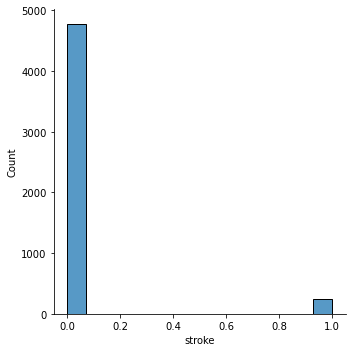

In [13]:
sns.displot(data.stroke)
#data is skewed, i.e 
#since there is minority data of target variable class=1 in the population, instead of dropping missing data for bmi. need to 
#find missing values
#when data is skewed and the target class is in minority level, we shall use precision and recall to evaluate model

In [14]:
data.drop(['id'],inplace=True,axis=1)

In [15]:
data.isna().sum()
##only bmi is missing

gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

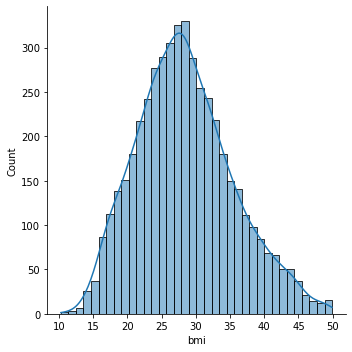

In [16]:
sns.displot(data.bmi,kde=True) ##looks normal distribution - verified with below mean & median calculations=> similar values

In [17]:
data.bmi.mean(),data.bmi.median(),data.bmi.std()

(28.444575569358193, 27.9, 7.011581592614139)

<AxesSubplot:xlabel='age', ylabel='bmi'>

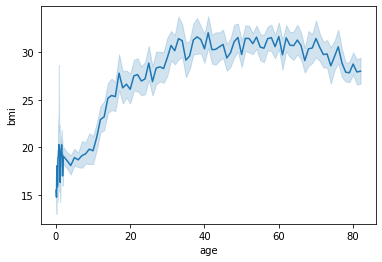

In [18]:
sns.lineplot(x='age',y='bmi',data=data)
#as the age goes up, bmi goes up - in a linear fashion

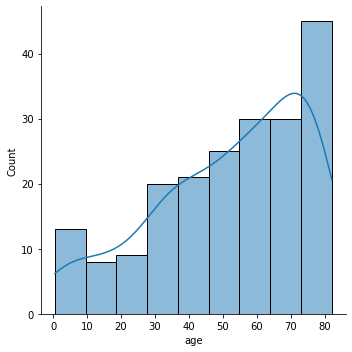

In [19]:
sns.displot(data.loc[data.bmi.isna()].age,kde="True")
#to fill in na bmi data
#fillna with mean/median value as the data is distributed on a normal distribution
#option2: find mean bmi by age_groups like 0-10,10-20,20-30,30-45,46-55,55-75,75-100
#option3: use linear regression to find as there is linear relation between age and bmi
#option4: drop na for bmi samples

In [20]:
#data.dropna(inplace=True,axis=0)

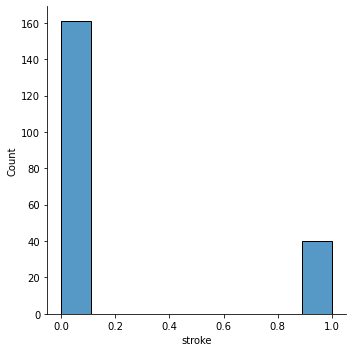

In [21]:
sns.displot(data.loc[data.bmi.isna()==True].stroke)

In [22]:
data.describe()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5031.000000,5031.000000,5031.000000,5031.000000,4830.000000,5031.000000
mean,43.187637,0.095607,0.054661,105.895828,28.444576,0.049294
std,22.729324,0.294081,0.227340,44.986836,7.011582,0.216503
min,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,25.000000,0.000000,0.000000,77.250000,23.500000,0.000000
50%,45.000000,0.000000,0.000000,91.850000,27.900000,0.000000
75%,61.000000,0.000000,0.000000,113.910000,32.800000,0.000000
max,82.000000,1.000000,1.000000,271.740000,49.900000,1.000000


In [23]:
data.Residence_type.unique()

array(['Urban', 'Rural'], dtype=object)

In [24]:
helper.replace_classes(data,["gender","ever_married","work_type","Residence_type","smoking_status"],[
    {"Female":0,"Male":1,"Other":2},
    {"No":0,"Yes":1},
    {"Private":0,"Self-employed":1,"Govt_job":2,"children":3,"Never_worked":4},
    {"Urban":0,"Rural":1},
    {"formerly smoked":0,"never smoked":1,"smokes":2,"children":3,"Unknown":4}
])

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,67.0,0,1,1,0,0,228.69,36.6,0,1
1,0,61.0,0,0,1,1,1,202.21,NaN,1,1
2,1,80.0,0,1,1,0,1,105.92,32.5,1,1
3,0,49.0,0,0,1,0,0,171.23,34.4,2,1
4,0,79.0,1,0,1,1,1,174.12,24.0,1,1
...,...,...,...,...,...,...,...,...,...,...,...
5105,0,80.0,1,0,1,0,0,83.75,NaN,1,0
5106,0,81.0,0,0,1,1,0,125.20,40.0,1,0
5107,0,35.0,0,0,1,1,1,82.99,30.6,1,0
5108,1,51.0,0,0,1,0,1,166.29,25.6,0,0


<AxesSubplot:xlabel='gender', ylabel='age'>

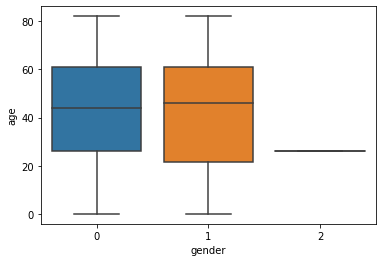

In [25]:
sns.boxplot(x="gender",y="age",data=data)

<AxesSubplot:ylabel='avg_glucose_level'>

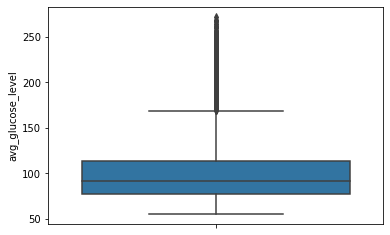

In [26]:
sns.boxplot(y="avg_glucose_level",data=data)

In [27]:
data.loc[data.avg_glucose_level>220].stroke.value_counts()

0    172
1     27
Name: stroke, dtype: int64

<AxesSubplot:ylabel='bmi'>

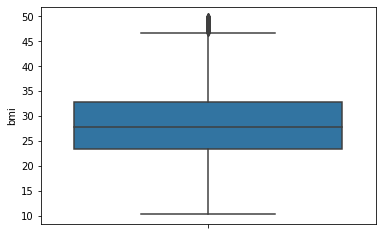

In [28]:
sns.boxplot(y="bmi",data=data)
#lot of outliers in bmi & glucoselevel features
#real life scenario-bmi to have more than the Q3+1.5*IQR is highly unlikely(rare)
#as with the above linear trend on age vs bmi, we can use age as a factor to identify missing bmi
#trail 1: use linear regression where the target feature would be bmi(to find missing bmi)

#trail#1 - bmi outliers treatment - handle outliers by replacing with the respective quartile 
#end values with added limit = Q +or- 1.5*IQR
#75th quartile -> 33.10 
#25th quartile -> 23.50
#upper limit 
upper_limit = 33.10 + 1.5*(33.10-23.50)
lower_limit = 23.50 - 1.5*(33.10-23.50)

data.loc[data.bmi>upper_limit,'bmi']=upper_limit
data.loc[data.bmi<lower_limit,'bmi']=lower_limit
#with this data imputation mse ~= 47 and bmi were predicted with less accuracy


In [29]:
#trail#2 - bmi outliers treatment - handle outliers by replacing with mean
#data.loc[(data.bmi>upper_limit) | (data.bmi<lower_limit) ,'bmi']=data.bmi.mean()

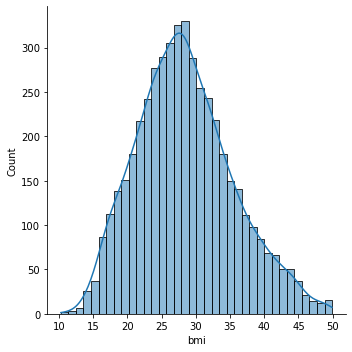

In [30]:
sns.displot(data.bmi,kde=True)

<AxesSubplot:ylabel='bmi'>

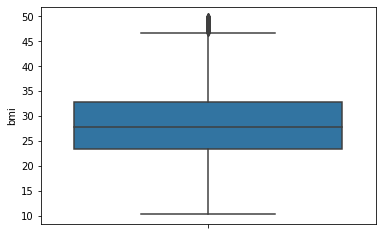

In [31]:
sns.boxplot(y="bmi",data=data)

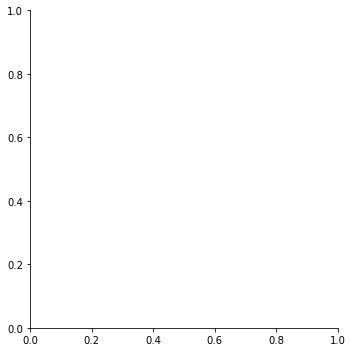

In [32]:
sns.displot(data.loc[data.bmi>=55].stroke)

In [33]:
data.isna().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [34]:
groups = data.groupby(['gender','stroke']).groups
lst=[]
for gender,stroke in groups:
    lst.append({'gender':gender,'stroke':stroke,'count':len(groups[(gender,stroke)])})
grp_df=pd.DataFrame(lst)

<AxesSubplot:xlabel='stroke', ylabel='count'>

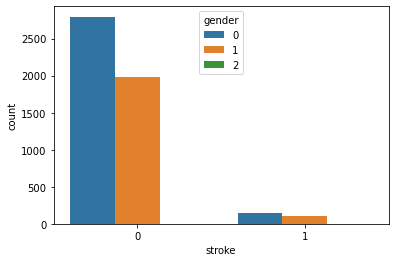

In [35]:
#stroke by gender
sns.barplot(x="stroke",y="count",data=grp_df,hue="gender")

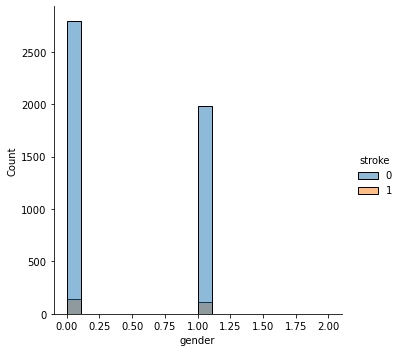

In [36]:
sns.displot(x="gender",hue="stroke",data=data)
#population has more of gender 0(female) samples compared to other
#but the outcome with stroke=1 is similar(or looks almost equal) among both male and female genders. and just 1 stroke whos gender=2

In [37]:
data.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,67.0,0,1,1,0,0,228.69,36.6,0,1
1,0,61.0,0,0,1,1,1,202.21,NaN,1,1
2,1,80.0,0,1,1,0,1,105.92,32.5,1,1
3,0,49.0,0,0,1,0,0,171.23,34.4,2,1
4,0,79.0,1,0,1,1,1,174.12,24.0,1,1


<AxesSubplot:xlabel='stroke', ylabel='age'>

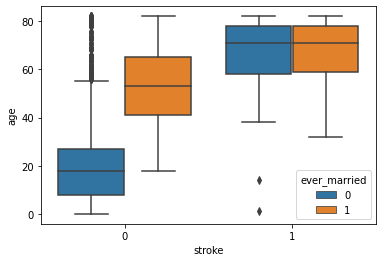

In [38]:
sns.boxplot(y="age",x="stroke",hue="ever_married",data=data)
##inference: if married, the average person age that is likely tohave stroke is around 70

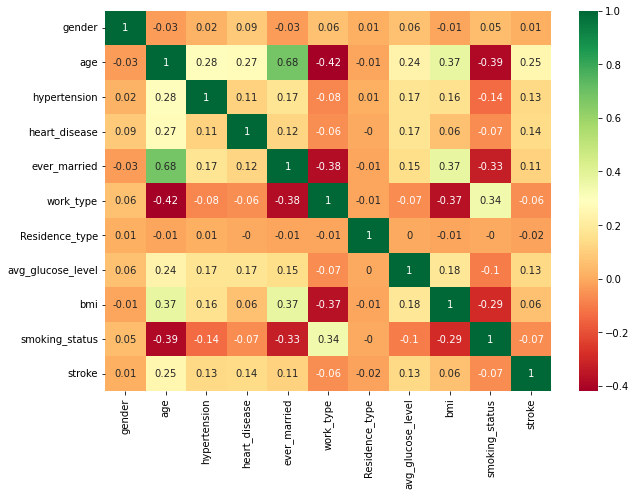

In [39]:
corr = data.corr().round(2)
plt.figure(figsize=(10,7))
sns.heatmap(corr, annot = True, cmap = 'RdYlGn');
## age & ever_married have high +ve correlation and looks like age correlates more with stroke comparing the ever_married
#correlation (age is carrying more information) - so drop ever_married feature

In [40]:
data.drop(["ever_married"],inplace=True,axis=1)

In [41]:
data.isna().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [42]:
#trail #1 - to find missing bmi using linear regression and just use the age as input feature
#train#2 - include gender as addition input feature and compare the results
#from sklearn.linear_model import LinearRegression
#reg = LinearRegression()
#bmi_features=['age']
#d_bmi = data.loc[data.bmi.isna()==False]
#d_no_bmi= data.loc[data.bmi.isna()==True]
#data_X=d_bmi[bmi_features]
#data_y=d_bmi.bmi
fltr=data.bmi.isna()
###this trail didn't add any addition value in accuracy
#train2, just fillna with mean of bmi
#data.loc[fltr==True,"bmi"]=data.loc[fltr==False].bmi.mean()

In [43]:
#data_X.age.mean(),data_X.age.median()

In [44]:
#data_X.head(),data_y.head()

In [45]:
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.metrics import mean_squared_error,confusion_matrix,classification_report

In [46]:
#x_train,x_cv,y_train,y_cv=train_test_split(data_X,data_y,test_size=0.25)

In [47]:
#reg =reg.fit(x_train,y_train)
#y_pred=reg.predict(x_train)
#print(f"error - {mean_squared_error(y_pred,y_train)}")

In [48]:
#reg.predict([[79]])

In [49]:
#if len(data.loc[fltr][bmi_features])>0:
    #data.loc[fltr,"bmi"]=reg.predict(data.loc[fltr][bmi_features])
data.bmi.fillna(data.bmi.mean(),inplace=True)

In [50]:
#data.isna().sum()
data.shape

(5031, 10)

In [51]:
data[["bmi","stroke"]].corr()

,bmi,stroke
bmi,1.000000,0.052854
stroke,0.052854,1.000000


In [52]:
from sklearn.preprocessing import StandardScaler
scalr = StandardScaler()
cols = ['age','avg_glucose_level', 'bmi']
scaled_d = scalr.fit_transform(data[['age','avg_glucose_level', 'bmi']])
d_f = pd.DataFrame(scaled_d,columns=cols)
d_f.head()

,age,avg_glucose_level,bmi
0,1.047754,2.729829,1.187214e+00
1,0.783751,2.141154,2.585906e-15
2,1.619759,0.000537,5.903627e-01
3,0.255746,1.452440,8.669525e-01
4,1.575758,1.516687,-6.470128e-01


In [53]:
data.drop(cols,axis=1,inplace=True)
data = pd.concat([data,d_f],axis=1)
data.dropna(axis=0,inplace=True)

In [54]:
data.head()

,gender,hypertension,heart_disease,work_type,Residence_type,smoking_status,stroke,age,avg_glucose_level,bmi
0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.047754,2.729829,1.187214e+00
1,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.783751,2.141154,2.585906e-15
2,1.0,0.0,1.0,0.0,1.0,1.0,1.0,1.619759,0.000537,5.903627e-01
3,0.0,0.0,0.0,0.0,0.0,2.0,1.0,0.255746,1.452440,8.669525e-01
4,0.0,1.0,0.0,1.0,1.0,1.0,1.0,1.575758,1.516687,-6.470128e-01


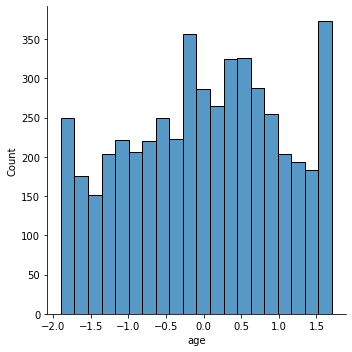

In [55]:
sns.displot(data.age)

<AxesSubplot:xlabel='stroke', ylabel='avg_glucose_level'>

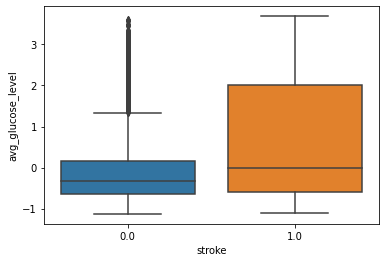

In [56]:
sns.boxplot(y="avg_glucose_level",x="stroke",data=data)

In [57]:
data.loc[data.stroke==0].describe()

,gender,hypertension,heart_disease,work_type,Residence_type,smoking_status,stroke,age,avg_glucose_level,bmi
count,4704.000000,4704.000000,4704.000000,4704.000000,4704.000000,4704.000000,4704.0,4704.000000,4704.000000,4704.000000
mean,0.415391,0.087160,0.048469,0.859269,0.493622,1.909864,0.0,-0.053734,-0.031277,-0.010829
std,0.493273,0.282099,0.214779,1.136714,0.500012,1.504955,0.0,0.986916,0.967690,1.007790
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,-1.896753,-1.128794,-2.641371
25%,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.0,-0.844264,-0.640603,-0.719800
50%,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.0,-0.008256,-0.324257,-0.050161
75%,1.000000,0.000000,0.000000,2.000000,1.000000,4.000000,0.0,0.695750,0.151874,0.590363
max,2.000000,1.000000,1.000000,4.000000,1.000000,4.000000,0.0,1.707760,3.598392,3.123343


In [58]:
data.avg_glucose_level = [112.69 if x>112 else x for x in data.avg_glucose_level]

<AxesSubplot:ylabel='avg_glucose_level'>

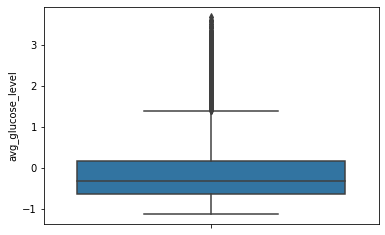

In [59]:
sns.boxplot(y="avg_glucose_level",data=data)

upper_limit = 33.10 + 1.5*(33.10-23.50)
lower_limit = 23.50 - 1.5*(33.10-23.50)

data.loc[data.bmi>upper_limit,'bmi']=upper_limit
data.loc[data.bmi<lower_limit,'bmi']=lower_limit

In [60]:
data.isna().sum()

gender               0
hypertension         0
heart_disease        0
work_type            0
Residence_type       0
smoking_status       0
stroke               0
age                  0
avg_glucose_level    0
bmi                  0
dtype: int64

In [62]:
features =['gender', 'age', 'hypertension', 'heart_disease', 
       'work_type', 'Residence_type', 'avg_glucose_level',
       'smoking_status']

data_X=data[features]
data_Y = data[["stroke"]]
data.columns

Index(['gender', 'hypertension', 'heart_disease', 'work_type',
       'Residence_type', 'smoking_status', 'stroke', 'age',
       'avg_glucose_level', 'bmi'],
      dtype='object')

In [63]:
data.isna().sum()

gender               0
hypertension         0
heart_disease        0
work_type            0
Residence_type       0
smoking_status       0
stroke               0
age                  0
avg_glucose_level    0
bmi                  0
dtype: int64

In [ ]:
### Random over sampling , does sampling with replacement using existing population
### this is major factor that helped in this model performing with ~ 97% f1-score using DecisionTreeClassifier

In [64]:
from imblearn.over_sampling import RandomOverSampler

In [183]:
ros = RandomOverSampler(sampling_strategy='minority')
X_resampled,y_res = ros.fit_resample(data_X,data_Y)

In [184]:
X_resampled.shape,y_res.shape

((9408, 8), (9408, 1))

In [185]:
X_train,X_test,y_train,y_test= train_test_split(X_resampled,y_res,test_size=0.30,random_state=0)
y_train=y_train.values.reshape(y_train.shape[0],)
y_test=y_test.values.reshape(y_test.shape[0],)

In [186]:
X_train.shape,X_test.shape

((6585, 8), (2823, 8))

In [187]:
X_train.isna().sum()

gender               0
age                  0
hypertension         0
heart_disease        0
work_type            0
Residence_type       0
avg_glucose_level    0
smoking_status       0
dtype: int64

In [188]:
from sklearn.linear_model import LogisticRegression

In [189]:
logis_clf= LogisticRegression(max_iter=1000)
scores = cross_val_score(logis_clf,X_train,y_train,cv=5)
logis_score = scores.mean()
print(scores)

[0.79954442 0.78208049 0.78663629 0.79878512 0.78208049]


In [190]:
logis_score

0.7898253606681853

In [191]:
logis_clf=logis_clf.fit(X_train,y_train)

In [192]:
logis_clf.score(X_test,y_test)

0.7729365922777187

In [193]:
#svm_clf.predict(X_train.iloc[y_train==1])

In [194]:
from sklearn import svm
svm_clf = svm.SVC(kernel='rbf')
scores = cross_val_score(svm_clf,X_train,y_train,cv=5)
svm_score = scores.mean()

In [195]:
svm_score

0.7998481397114655

In [196]:
svm_clf=svm_clf.fit(X_train,y_train)

In [197]:
svm_clf.predict(X_train.iloc[y_train==1])

array([1., 1., 1., ..., 1., 1., 1.])

In [198]:
svm_clf.score(X_test,y_test)

0.798087141339001

In [199]:
y_pred=logis_clf.predict(X_test)

In [200]:
print(confusion_matrix(**{'y_true':y_test,'y_pred':y_pred}))
print(classification_report(**{'y_true':y_test,'y_pred':y_pred}))

##### confusion metrix shows that, lot of false negatives(~69).which means model would simply report negative(no stroke) 
##for lot many people who had stroke

##looking at precision recall & f1 scores, can see that for class =1 model isn't predicting much of true labels with =1

[[1049  360]
 [ 281 1133]]
              precision    recall  f1-score   support

         0.0       0.79      0.74      0.77      1409
         1.0       0.76      0.80      0.78      1414

    accuracy                           0.77      2823
   macro avg       0.77      0.77      0.77      2823
weighted avg       0.77      0.77      0.77      2823



In [201]:
from sklearn.naive_bayes import GaussianNB

In [202]:
nb=GaussianNB()
scores = cross_val_score(nb,X_train,y_train,cv=5)
nb_score = scores.mean()
print(nb_score)

0.7579347000759301


In [203]:
nb=nb.fit(X_train,y_train)

In [204]:
y_pred=nb.predict(X_test)

In [205]:
print(confusion_matrix(**{'y_true':y_test,'y_pred':y_pred}))
print(classification_report(**{'y_true':y_test,'y_pred':y_pred}))

[[1128  281]
 [ 391 1023]]
              precision    recall  f1-score   support

         0.0       0.74      0.80      0.77      1409
         1.0       0.78      0.72      0.75      1414

    accuracy                           0.76      2823
   macro avg       0.76      0.76      0.76      2823
weighted avg       0.76      0.76      0.76      2823



In [217]:
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier

In [218]:
dtree= RandomForestClassifier(random_state=2022)

In [219]:
dtree=dtree.fit(X_train,y_train)

In [220]:
y_pred = dtree.predict(X_test)

In [221]:
print(confusion_matrix(**{'y_true':y_test,'y_pred':y_pred}))
print(classification_report(**{'y_true':y_test,'y_pred':y_pred}))

### 0 false negatives in the confusion metrix, so - all positive cases are predicted correctly
###45 - false positives -> predicted stroke=1 for 45 samples when the actual stroke was 0

[[1364   45]
 [   0 1414]]
              precision    recall  f1-score   support

         0.0       1.00      0.97      0.98      1409
         1.0       0.97      1.00      0.98      1414

    accuracy                           0.98      2823
   macro avg       0.98      0.98      0.98      2823
weighted avg       0.98      0.98      0.98      2823



In [211]:
import tensorflow as tf
from tensorflow import keras

In [212]:
net = keras.Sequential([
    keras.layers.Dense(units=75,activation='relu'),
    keras.layers.Dense(units=50,activation='relu'),
    keras.layers.Dense(units=25,activation='relu'),
    keras.layers.Dense(units=1,activation='sigmoid')
])
net.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.005),loss=tf.keras.losses.BinaryCrossentropy())

In [213]:
net.fit(X_train,y_train,epochs=300)

Epoch 1/300
206/206 [==============================] - 1s 1ms/step - loss: 0.4621
Epoch 2/300
206/206 [==============================] - 0s 1ms/step - loss: 0.4235
Epoch 3/300
206/206 [==============================] - 0s 1ms/step - loss: 0.3955
Epoch 4/300
206/206 [==============================] - 0s 2ms/step - loss: 0.3738
Epoch 5/300
206/206 [==============================] - 0s 1ms/step - loss: 0.3525
Epoch 6/300
206/206 [==============================] - 0s 2ms/step - loss: 0.3367
Epoch 7/300
206/206 [==============================] - 0s 2ms/step - loss: 0.3226
Epoch 8/300
206/206 [==============================] - 0s 2ms/step - loss: 0.3047
Epoch 9/300
206/206 [==============================] - 0s 2ms/step - loss: 0.2942
Epoch 10/300
206/206 [==============================] - 0s 2ms/step - loss: 0.2841
Epoch 11/300
206/206 [==============================] - 0s 2ms/step - loss: 0.2679
Epoch 12/300
206/206 [==============================] - 0s 2ms/step - loss: 0.2581
Epoch 13/300


206/206 [==============================] - 0s 2ms/step - loss: 0.0664
Epoch 100/300
206/206 [==============================] - 0s 2ms/step - loss: 0.0739
Epoch 101/300
206/206 [==============================] - 0s 2ms/step - loss: 0.0591
Epoch 102/300
206/206 [==============================] - 0s 1ms/step - loss: 0.0694
Epoch 103/300
206/206 [==============================] - 0s 1ms/step - loss: 0.0802
Epoch 104/300
206/206 [==============================] - 0s 1ms/step - loss: 0.0712
Epoch 105/300
206/206 [==============================] - 0s 1ms/step - loss: 0.0643
Epoch 106/300
206/206 [==============================] - 0s 2ms/step - loss: 0.0640
Epoch 107/300
206/206 [==============================] - 0s 2ms/step - loss: 0.0652
Epoch 108/300
206/206 [==============================] - 0s 1ms/step - loss: 0.0657
Epoch 109/300
206/206 [==============================] - 0s 1ms/step - loss: 0.0842
Epoch 110/300
206/206 [==============================] - 0s 1ms/step - loss: 0.0656
Epoch 

206/206 [==============================] - 0s 1ms/step - loss: 0.0493
Epoch 197/300
206/206 [==============================] - 0s 2ms/step - loss: 0.0449
Epoch 198/300
206/206 [==============================] - 0s 2ms/step - loss: 0.0324
Epoch 199/300
206/206 [==============================] - 0s 1ms/step - loss: 0.0552
Epoch 200/300
206/206 [==============================] - 0s 2ms/step - loss: 0.0676
Epoch 201/300
206/206 [==============================] - 0s 2ms/step - loss: 0.0609
Epoch 202/300
206/206 [==============================] - 0s 1ms/step - loss: 0.0446
Epoch 203/300
206/206 [==============================] - 0s 874us/step - loss: 0.0358
Epoch 204/300
206/206 [==============================] - 0s 1ms/step - loss: 0.0438
Epoch 205/300
206/206 [==============================] - 0s 2ms/step - loss: 0.0471
Epoch 206/300
206/206 [==============================] - 0s 2ms/step - loss: 0.0360
Epoch 207/300
206/206 [==============================] - 0s 2ms/step - loss: 0.0325
Epoc

206/206 [==============================] - 0s 2ms/step - loss: 0.0308
Epoch 294/300
206/206 [==============================] - 0s 2ms/step - loss: 0.0338
Epoch 295/300
206/206 [==============================] - 0s 2ms/step - loss: 0.0469
Epoch 296/300
206/206 [==============================] - 0s 2ms/step - loss: 0.0326
Epoch 297/300
206/206 [==============================] - 0s 1ms/step - loss: 0.0387
Epoch 298/300
206/206 [==============================] - 0s 2ms/step - loss: 0.0378
Epoch 299/300
206/206 [==============================] - 0s 2ms/step - loss: 0.0457
Epoch 300/300
206/206 [==============================] - 0s 2ms/step - loss: 0.0645


In [178]:
y_pred= np.asarray(net.predict(X_test))

89/89 [==============================] - 0s 1ms/step


In [179]:
len(y_pred[y_pred>0.5])

1499

In [180]:
y_pred = np.asarray([0 if v < 0.5 else 1 for v in y_pred])

In [181]:
len(y_pred[y_pred==1])

1499

In [182]:
print(confusion_matrix(**{'y_true':y_test,'y_pred':y_pred}))
print(classification_report(**{'y_true':y_test,'y_pred':y_pred}))

[[1315   94]
 [   9 1405]]
              precision    recall  f1-score   support

         0.0       0.99      0.93      0.96      1409
         1.0       0.94      0.99      0.96      1414

    accuracy                           0.96      2823
   macro avg       0.97      0.96      0.96      2823
weighted avg       0.97      0.96      0.96      2823

